In [1]:
import numpy as np
import os
import h5py
from getdist import plots, MCSamples
import getdist

import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize,
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2
import plotter
import utils

In [2]:
all_params = ['Omega_m', 'Omega_b', 'sigma_8', 'h', 'n_s', 'N_eff', 'w', 'M_sat', 'alpha', 'M_cut', 'sigma_logM', 'v_bc', 'v_bs', 'c_vir', 'f', 'f_env', 'delta_env', 'sigma_env']

In [3]:
cosmo_params = ['Omega_m', 'Omega_b', 'sigma_8', 'h', 'n_s', 'N_eff', 'w']
hod_params = ['M_sat', 'alpha', 'M_cut', 'sigma_logM', 'v_bc', 'v_bs', 'c_vir', 'f']
ab_params = ['f_env', 'delta_env', 'sigma_env']
hod_interest = ['M_sat', 'M_cut', 'alpha', 'f_env', 'delta_env']
all_interest = ['Omega_m', 'sigma_8', 'M_sat', 'f_env', 'delta_env']

In [4]:
param_labels = {'Omega_m': '\Omega_m', 
                'Omega_b': '\Omega_b', 
                'sigma_8': '\sigma_8', 
                'h': 'h', 
                'n_s': 'n_s',
                'N_eff': 'N_{eff}', 
                'w': 'w', 
                'M_sat': 'M_{sat}', 
                'alpha': r'\alpha', 
                'M_cut': 'M_{cut}', 
                'sigma_logM': '\sigma_{logM}', 
                'v_bc': 'v_{bc}', 
                'v_bs': 'v_{bs}', 
                'c_vir': 'c_{vir}', 
                'f': 'f', 
                'f_env': 'f_{env}', 
                'delta_env': '\delta_{env}', 
                'sigma_env': '\sigma_{env}'}

In [5]:
bounds = utils.get_emulator_bounds()

In [6]:
def plot_contours(chaintags, legend_labels=None, params_toplot=None, nsteps=None, colors=None): 
    
    sample_arr = []
    for i, chaintag in enumerate(chaintags):
        chain_fn = f'../chains/chains_{chaintag}.h5'
        fw = h5py.File(chain_fn, 'r')

        chain_dset = fw['chain']
        print(chain_dset)
        chain = np.array(chain_dset)
        lnprob_dset = fw['lnprob']
        param_names = fw.attrs['param_names']
        true_values = fw.attrs['true_values']
        if nsteps:
            chain = chain[:,:nsteps,:]
        nwalkers, nchain, ndim = chain.shape
        fw.close()

        if params_toplot is not None:    
            idxs = []
            for pm in params_toplot:
                idxs.append(np.where(param_names == pm))
            idxs = np.array(idxs).flatten()
            chain = chain[:,:,idxs]
            param_names = params_toplot
            true_values = true_values[idxs]

        samples = chain.reshape(-1, chain.shape[-1])
        labels = [param_labels[pn] for pn in param_names]
        ranges = [bounds[pn] for pn in param_names]
        samps = MCSamples(samples=samples, names=param_names, labels=labels, ranges=ranges)
        sample_arr.append(samps)
        
    
    g = plots.get_subplot_plotter()
    g.settings.alpha_filled_add=0.4
    g.settings.figure_legend_frame = False
    g.settings.legend_fontsize = 20
    g.settings.axis_marker_lw = 1.0
    g.settings.axis_marker_color = 'dimgrey'
    g.triangle_plot(sample_arr, filled=True, contour_colors=colors, names=param_names,
                   legend_labels=legend_labels, markers=true_values, title_limit=1, legend_loc='upper center',
                   #marker_args={'color': 'orange', 'lw':1.5}
                   )
    return g

<HDF5 dataset "chain": shape (250, 20000, 7), type "<f4">
Removed no burn in


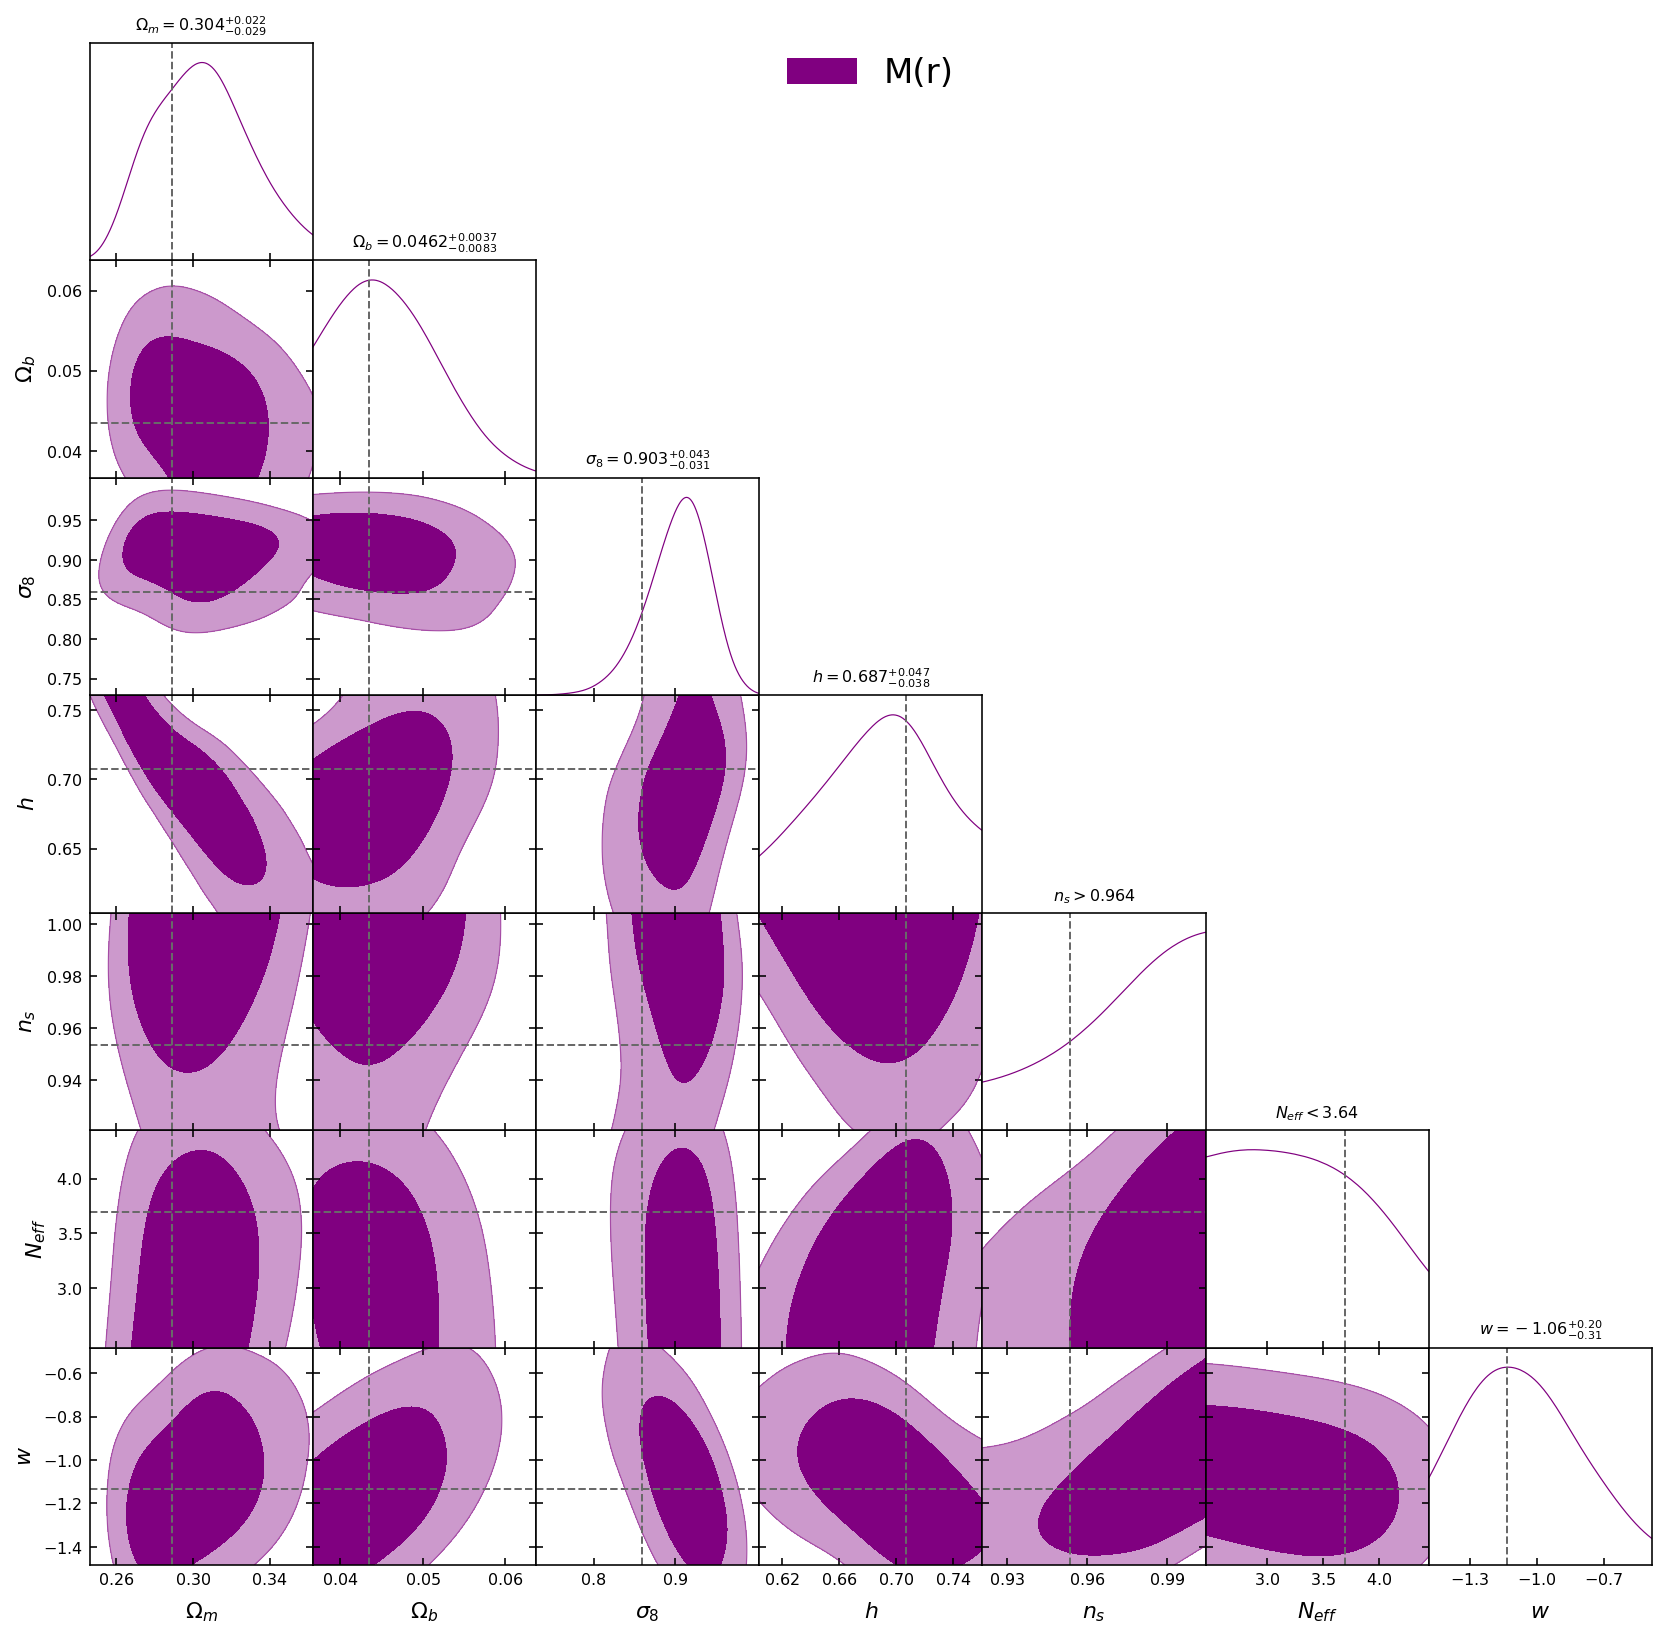

In [7]:
params_toplot = cosmo_params
legend_labels = ['M(r)']
figure = plot_contours(['mcf_c3h3_allcosmo_covperf_nw250'], params_toplot=params_toplot, colors=['purple'],
                      legend_labels=legend_labels)

<HDF5 dataset "chain": shape (250, 26900, 11), type "<f4">
Removed no burn in


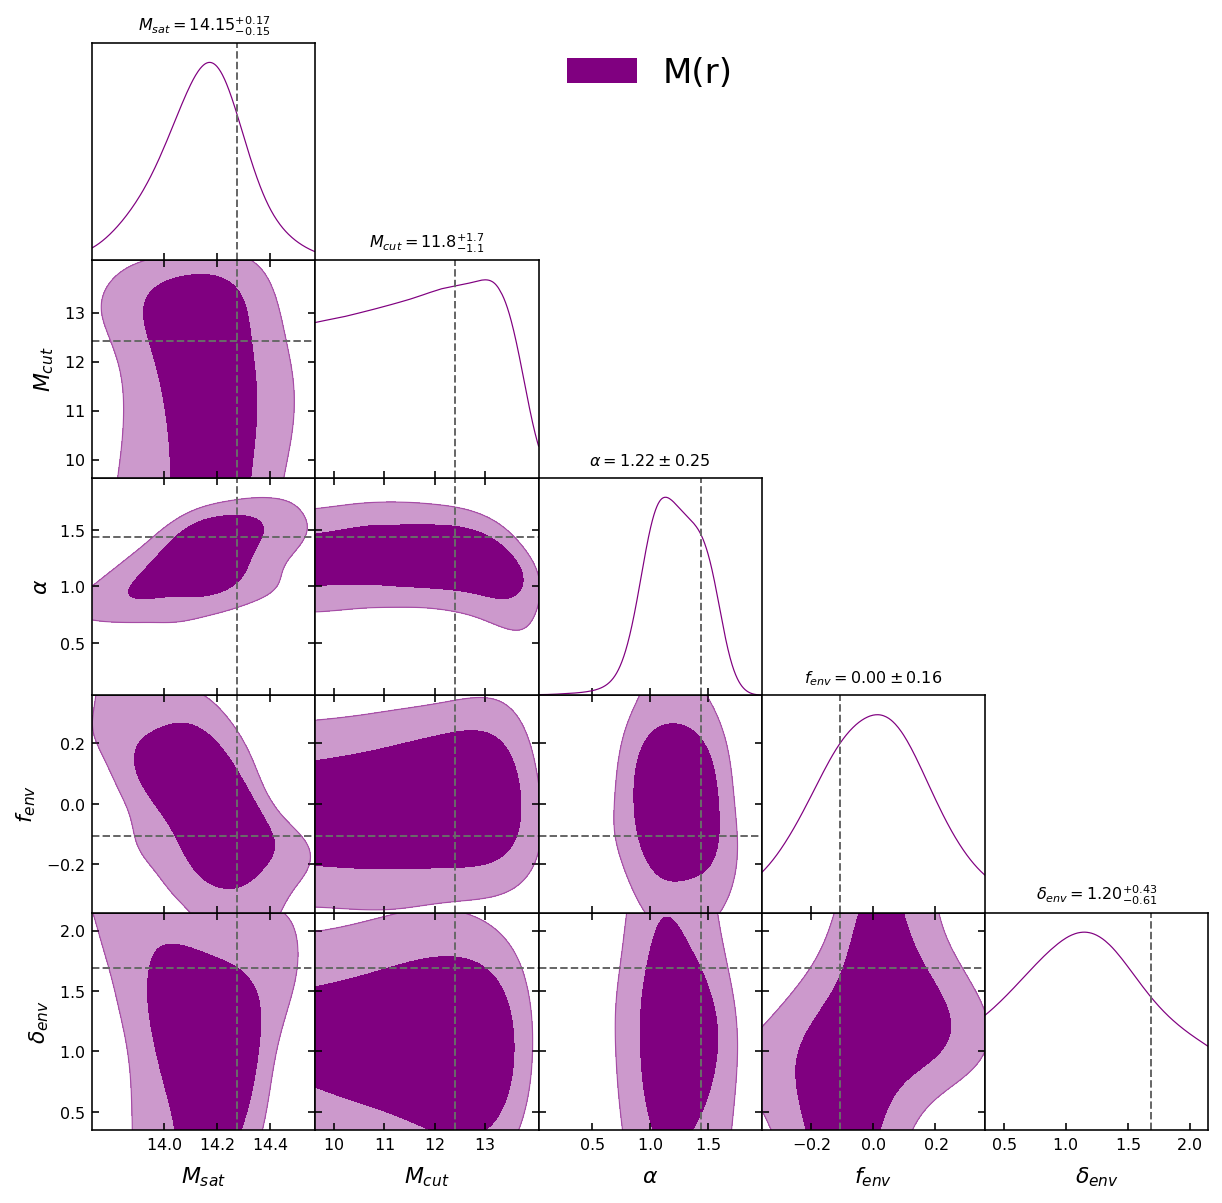

In [8]:
params_toplot = hod_interest
legend_labels = ['M(r)']
figure = plot_contours(['mcf_c3h3_allhod_covperf_nw250'], params_toplot=params_toplot, colors=['purple'],
                      legend_labels=legend_labels)

<HDF5 dataset "chain": shape (250, 23600, 18), type "<f4">
Removed no burn in


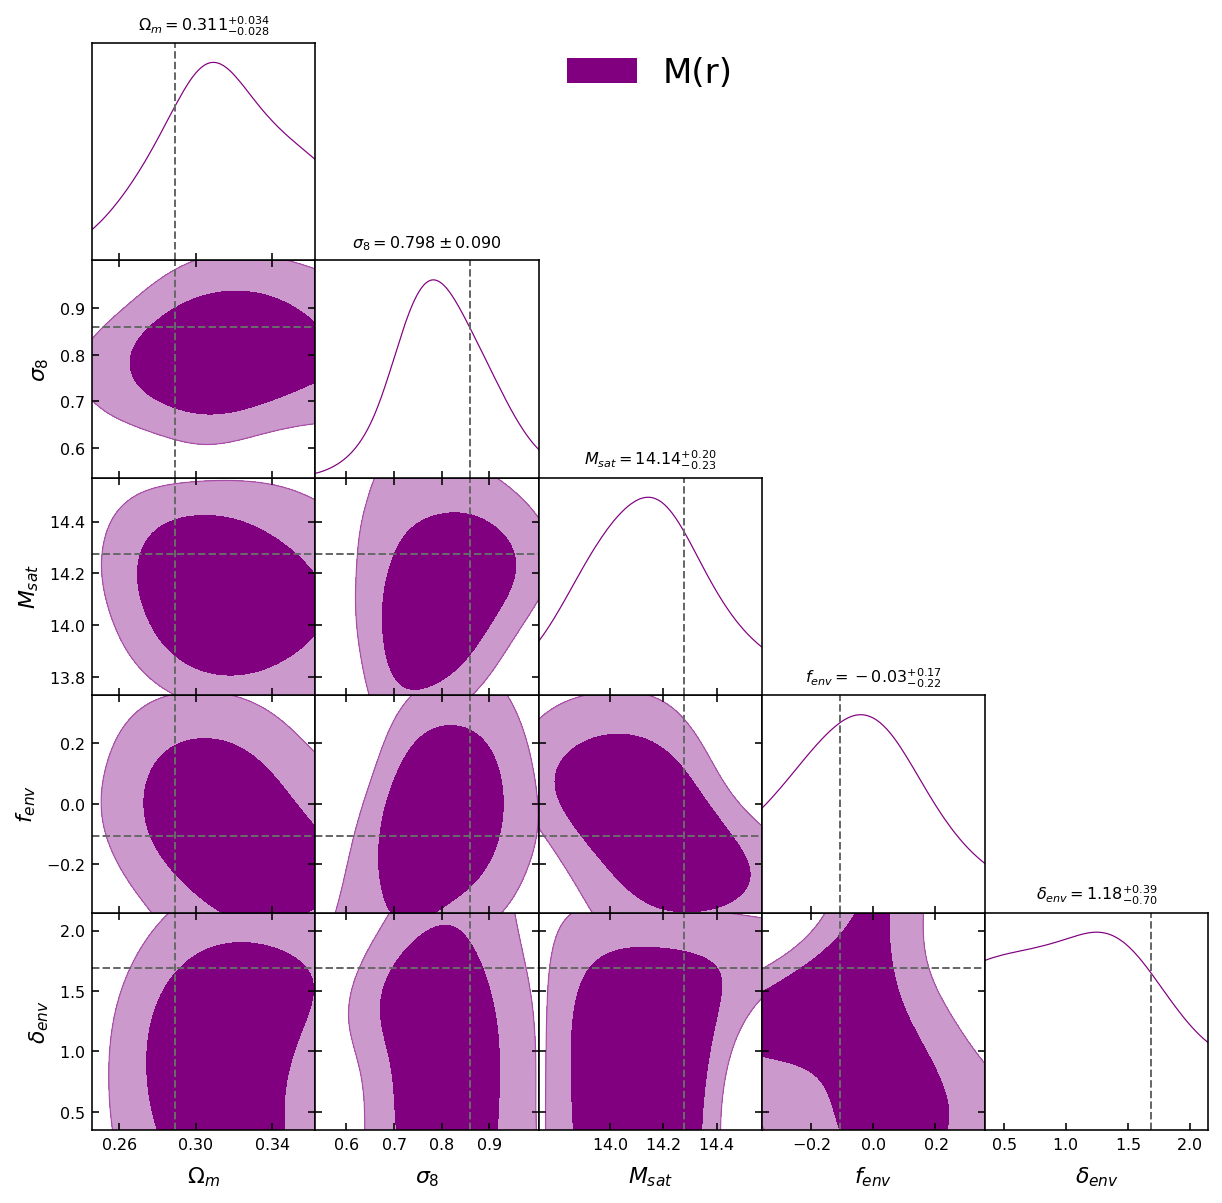

In [9]:
params_toplot = all_interest
legend_labels = ['M(r)']
figure = plot_contours(['mcf_c3h3_all_covperf_nw250'], params_toplot=params_toplot, colors=['purple'],
                       legend_labels=legend_labels)

<HDF5 dataset "chain": shape (250, 85700, 7), type "<f4">
Removed no burn in
<HDF5 dataset "chain": shape (250, 33600, 7), type "<f4">
Removed no burn in
<HDF5 dataset "chain": shape (250, 5000, 7), type "<f4">
Removed no burn in


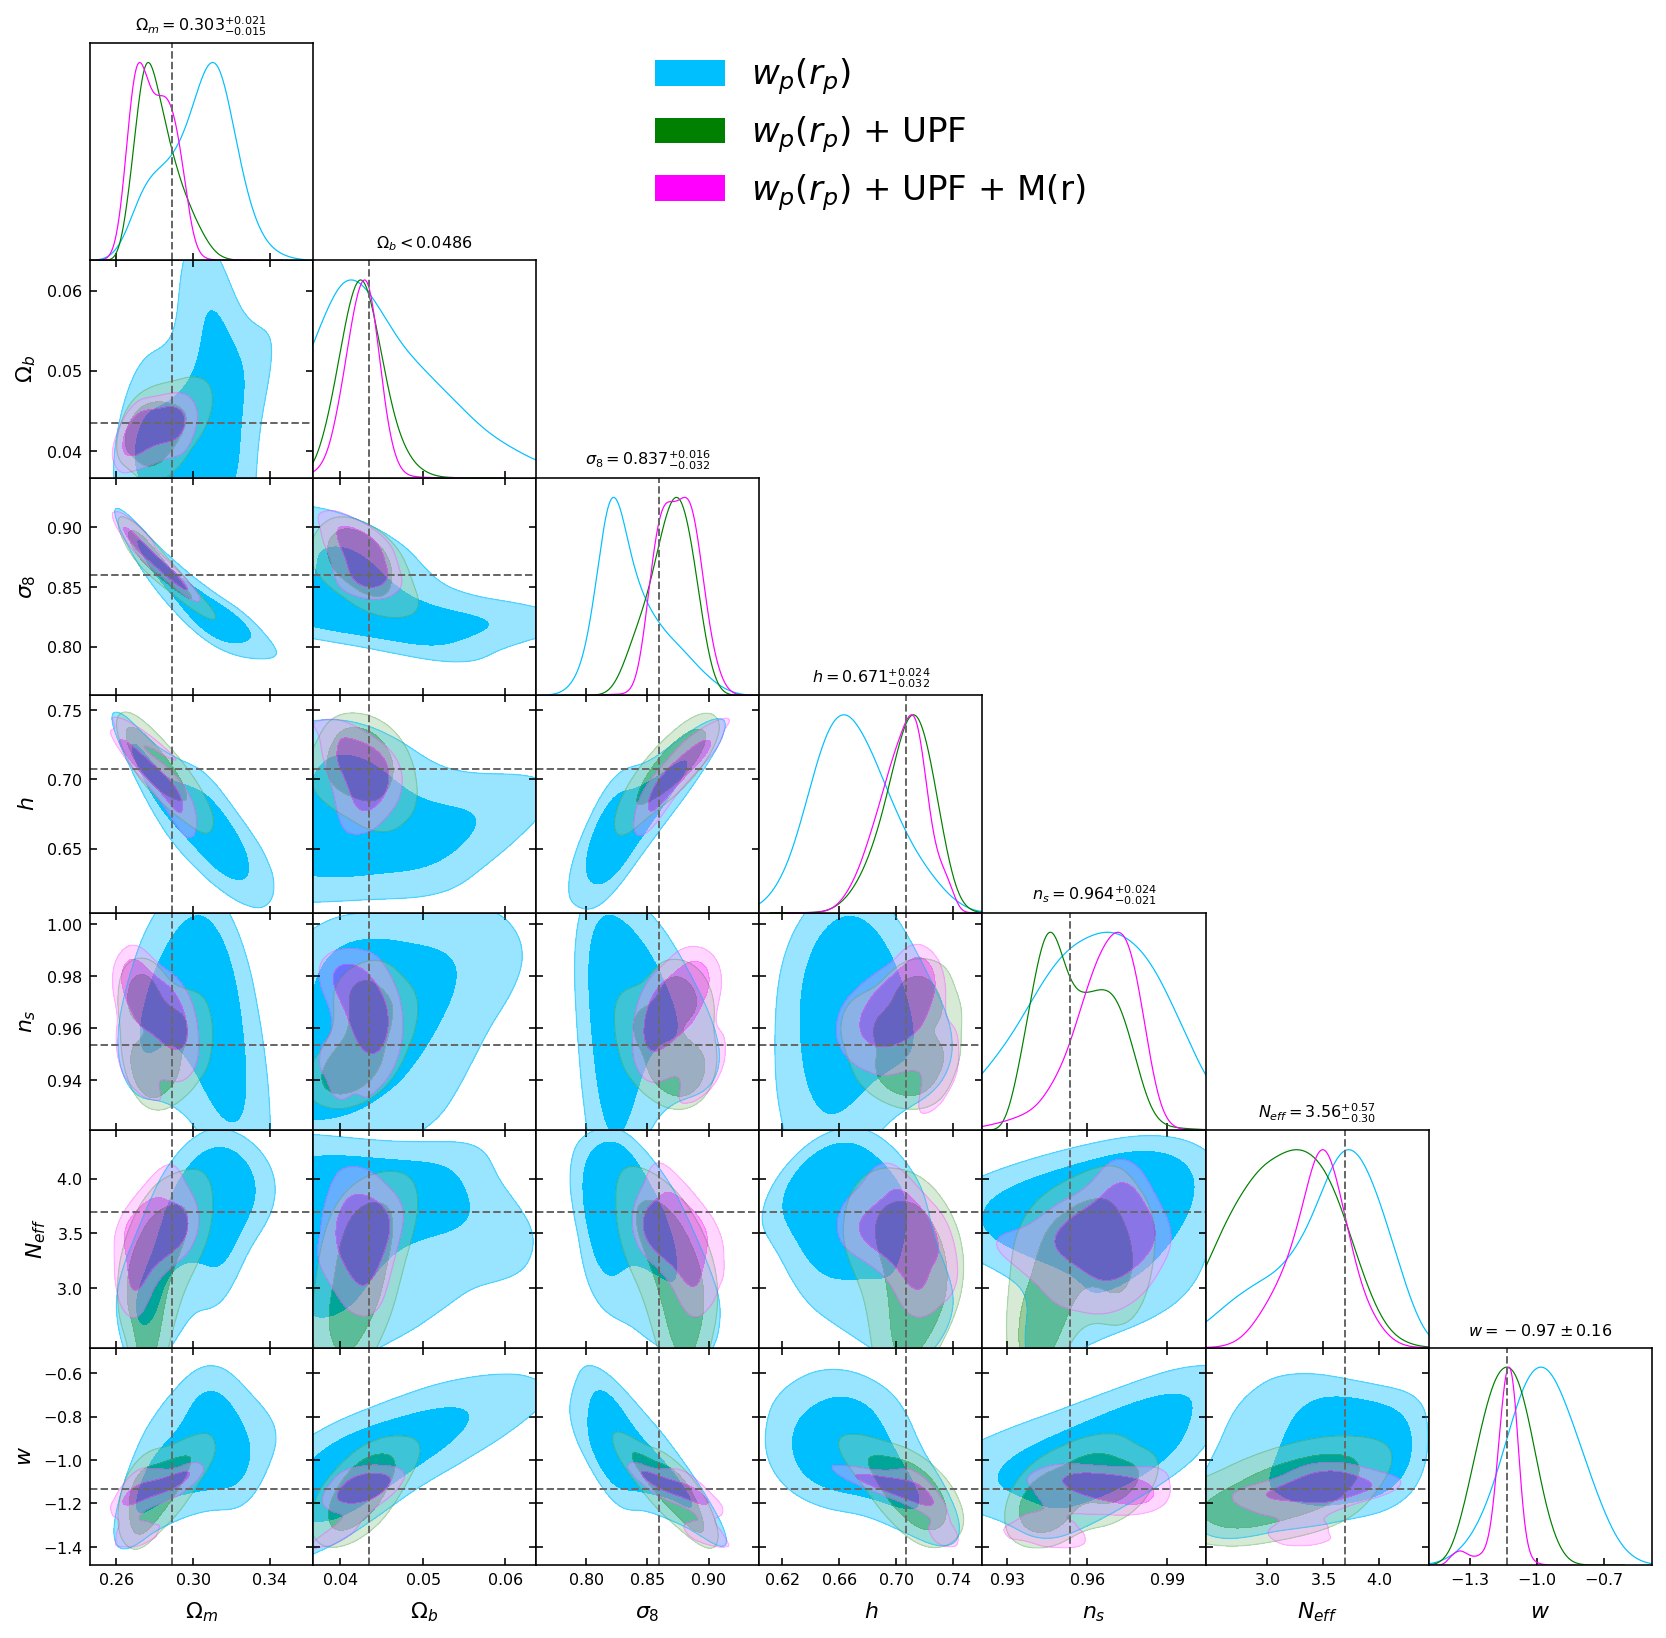

In [10]:
params_toplot = cosmo_params
chaintags = ['wp_c3h3_allcosmo_covperf_nw250', 
            'wp_upf_c3h3_allcosmo_covperf_nw250',
            'wp_upf_mcf_c3h3_allcosmo_covperf_nw250']
legend_labels = ['$w_p(r_p)$', '$w_p(r_p)$ + UPF', '$w_p(r_p)$ + UPF + M(r)']
colors = ['deepskyblue', 'green', 'magenta']
figure = plot_contours(chaintags, params_toplot=params_toplot, colors=colors, legend_labels=legend_labels)

<HDF5 dataset "chain": shape (250, 15200, 11), type "<f4">
Removed no burn in
<HDF5 dataset "chain": shape (250, 13600, 11), type "<f4">
Removed no burn in
<HDF5 dataset "chain": shape (250, 6600, 11), type "<f4">
Removed no burn in


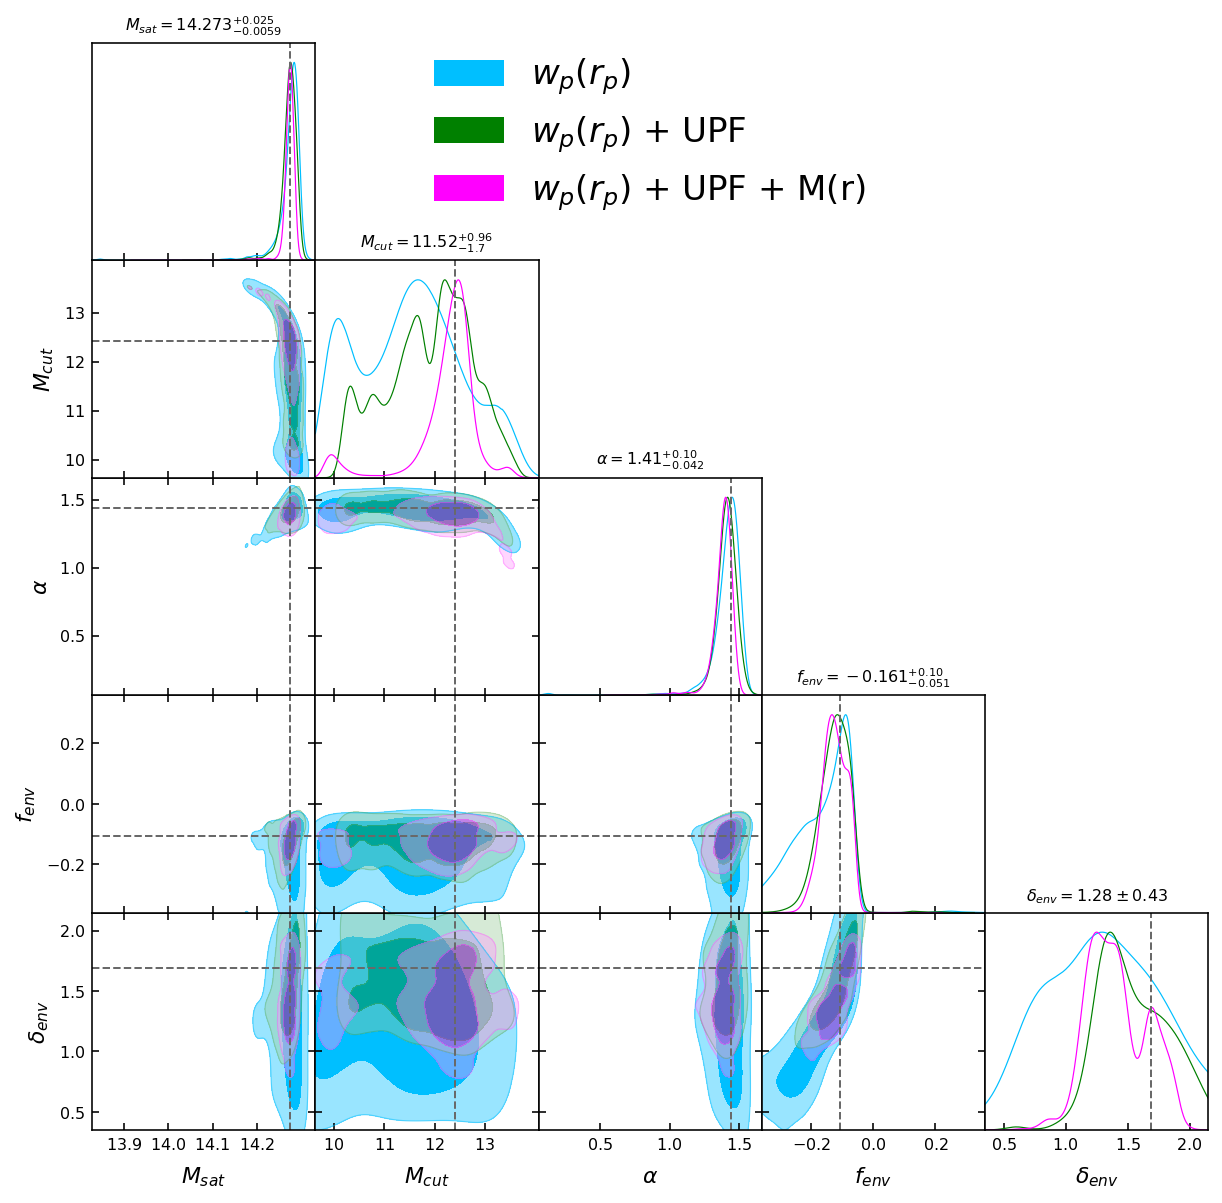

In [12]:
params_toplot = hod_interest
chaintags = ['wp_c3h3_allhod_covperf_nw250',
            'wp_upf_c3h3_allhod_covperf_nw250', 
            'wp_upf_mcf_c3h3_allhod_covperf_nw250']
legend_labels = ['$w_p(r_p)$', '$w_p(r_p)$ + UPF', '$w_p(r_p)$ + UPF + M(r)']
colors = ['deepskyblue', 'green', 'magenta']
figure = plot_contours(chaintags, params_toplot=params_toplot, colors=colors, legend_labels=legend_labels)

<HDF5 dataset "chain": shape (250, 100000, 18), type "<f4">
Removed no burn in
<HDF5 dataset "chain": shape (250, 13300, 18), type "<f4">
Removed no burn in
<HDF5 dataset "chain": shape (250, 7200, 18), type "<f4">
Removed no burn in


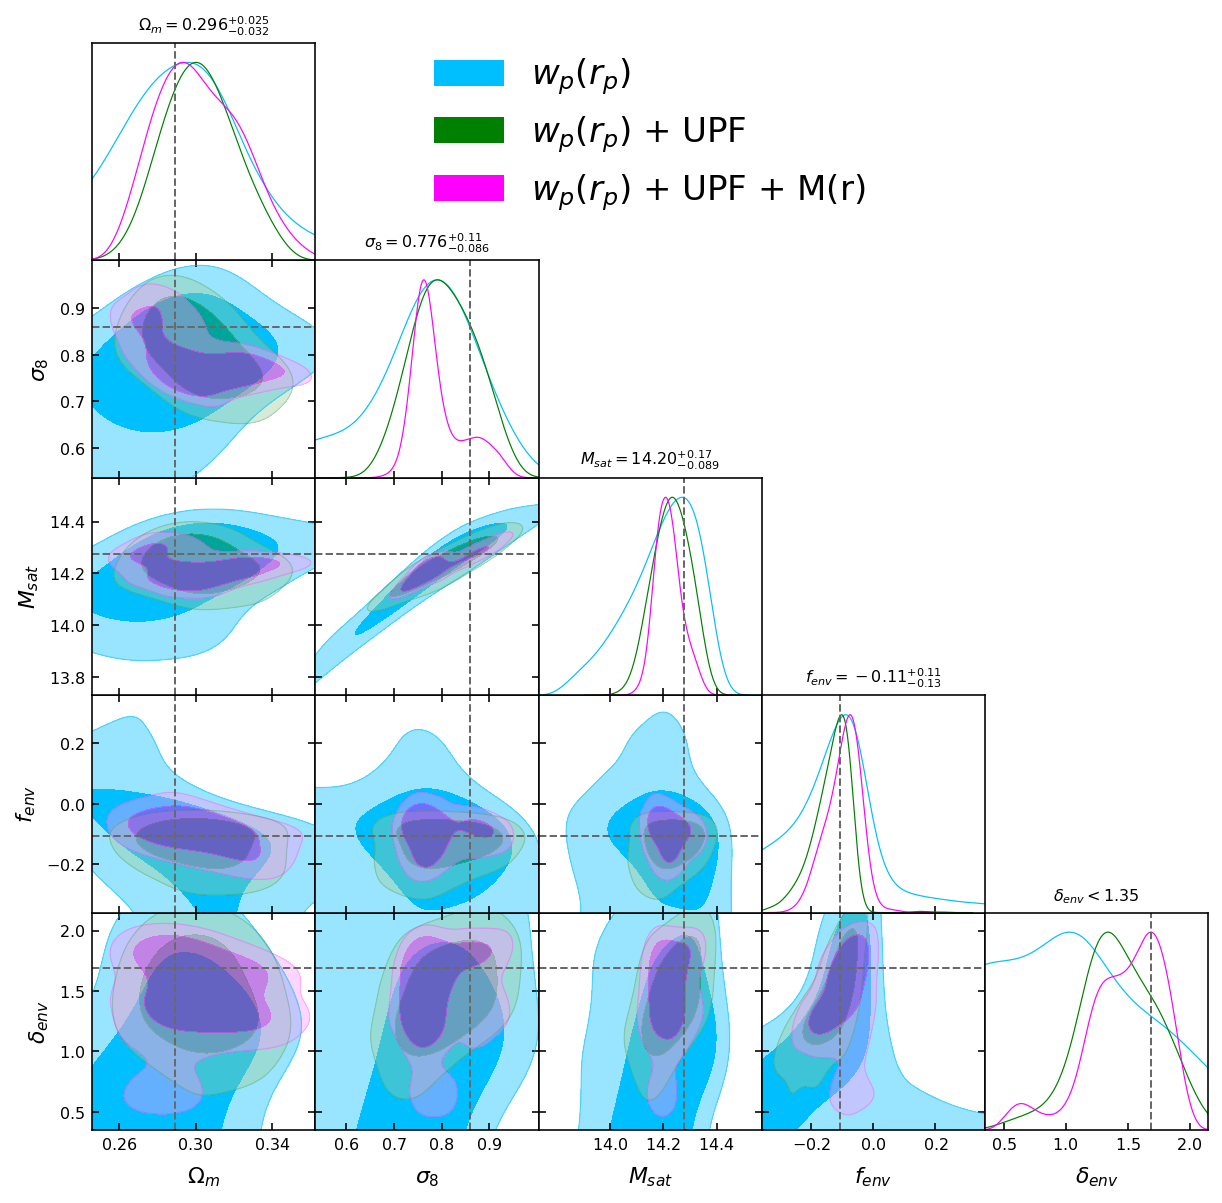

In [13]:
params_toplot = all_interest
chaintags = ['wp_c3h3_all_covperf_nw250',
            'wp_upf_c3h3_all_covperf_nw250', 
            'wp_upf_mcf_c3h3_all_covperf_nw250']
legend_labels = ['$w_p(r_p)$', '$w_p(r_p)$ + UPF', '$w_p(r_p)$ + UPF + M(r)']
colors = ['deepskyblue', 'green', 'magenta']
figure = plot_contours(chaintags, params_toplot=params_toplot, colors=colors, legend_labels=legend_labels)